**AMCAT DATA ANALYSIS**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [34]:
df=pd.read_excel('D:/Data Analyst/Innomatics Intern/AMCAT Data Analysis/data.xlsx')

**EDA**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [36]:
print(df.head())

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

In [37]:
#missing values
print(df.isnull().sum())

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [38]:
#Remove leading and trailing spaces
df['JobCity'] = df['JobCity'].str.strip()

#Captalize city names
df['JobCity'] = df['JobCity'].apply(lambda x: str(x).capitalize() if isinstance(x, str) else x)

#Replace numerical values like -1 with 'NA'
df['JobCity'] = df['JobCity'].replace([-1], 'N/A')

city_corrections = {
    'Banglore': 'Bangalore',
    'Nouda': 'Noida',
    'Gurgoan': 'Gurgaon',
    'Gaziabaad': 'Ghaziabad',
    'Guragaon': 'Gurgaon',
    'Banagalore': 'Bangalore',
    'Hderabad': 'Hyderabad',
    'Vsakhapttnam': 'Visakhapatnam',
    'Bhubaneshwar': 'Bhubaneswar',
    'Trivandrum': 'Thiruvananthapuram',
    'Bhubneshwar': 'Bhubaneswar',
    'Technopark, trivandrum': 'Thiruvananthapuram',
    'Nasikcity': 'Nashik',
    'Kochi/cochin': 'Kochi',
    'Kochi/cochin, chennai and coimbatore': 'Kochi',
    'Navi mumbai': 'Navi Mumbai',
    'New delhi': 'Delhi',
    'New delhi - jaisalmer': 'Delhi',
    'Delhi/ncr': 'Delhi',
    'Chennai, bangalore': 'Chennai & Bangalore',
    'Chennai & mumbai': 'Chennai & Mumbai',
    'A-64,sec-64,noida': 'Noida',
    'Pune`': 'Pune',
    'Punr': 'Pune',
    'Mumbai': 'Mumbai',
    'Gajiabaad': 'Ghaziabad',
    'Baddi hp': 'Baddi',
    'Hissar': 'Hisar',
    'Banaglore': 'Bangalore',
    'Muzzafarpur': 'Muzaffarpur',
    'Mettur, tamil nadu': 'Mettur',
    'Singaruli': 'Singrauli',
    'Durgapur': 'Durgapur',
    'Rohtak': 'Rohtak',
    'Vellore': 'Vellore',
    'Ratnagiri': 'Ratnagiri',
    'Kochi': 'Kochi',
    'Thane': 'Thane',
    'Kalmar, sweden': 'Kalmar, Sweden',
    'Jeddah saudi arabia': 'Jeddah, Saudi Arabia',
    'Kochi/cochin, chennai and coimbatore': 'Kochi',
    'Kudankulam ,tarapur': 'Kudankulam & Tarapur',
    'Muvattupuzha': 'Muvattupuzha',
    'Gurgoan': 'Gurgaon',
    'Rayagada, odisha': 'Rayagada',
    'Siliguri': 'Siliguri',
    'Una': 'Una',
    'Nagari': 'Nagari',
    'Ambala city': 'Ambala',
    'Yamuna nagar': 'Yamuna Nagar',
    'Gagret': 'Gagret',
    'Sadulpur,rajgarh,distt-churu,rajasthan': 'Sadulpur',
    'Kochi': 'Kochi',
    'Burdwan': 'Burdwan',
    'Muzaffarnagar': 'Muzaffarnagar',
    'New dehli': 'Delhi',
    'Pilani': 'Pilani',
    'Joshimath': 'Joshimath',
    'Maharajganj': 'Maharajganj',
    'Sahibabad': 'Sahibabad',
    'Ras al khaimah': 'Ras Al Khaimah',
    'Bundi': 'Bundi',
    'Haryana': 'Haryana',
    'Haldia': 'Haldia',
    'Asifabadbanglore': 'Asifabad & Bangalore',
    'Vapi': 'Vapi',
    'Patiala': 'Patiala'
}

# Replace 
df['JobCity'] = df['JobCity'].replace(city_corrections)

print(df['JobCity'].unique())

['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Noida'
 'Kolkata' 'Pune' nan 'Mohali' 'Jhansi' 'Delhi' 'Bhubaneswar'
 'Navi Mumbai' 'Mumbai' 'Mangalore' 'Rewari' 'Ghaziabad' 'Bhiwadi'
 'Mysore' 'Rajkot' 'Greater noida' 'Jaipur' 'Thane' 'Maharajganj'
 'Thiruvananthapuram' 'Punchkula' 'Coimbatore' 'Dhanbad' 'Lucknow'
 'Gandhi nagar' 'Una' 'Daman and diu' 'Visakhapatnam' 'Nagpur' 'Bhagalpur'
 'Ahmedabad' 'Kochi' 'Bankura' 'Bengaluru' 'Kanpur' 'Vijayawada' 'Beawar'
 'Alwar' 'Siliguri' 'Raipur' 'Bhopal' 'Faridabad' 'Jodhpur' 'Udaipur'
 'Muzaffarpur' 'Kolkata`' 'Bulandshahar' 'Haridwar' 'Raigarh' 'Jabalpur'
 'Unnao' 'Aurangabad' 'Belgaum' 'Dehradun' 'Rudrapur' 'Jamshedpur' 'Vizag'
 'Dharamshala' 'Hisar' 'Ranchi' 'Madurai' 'Gurga' 'Chandigarh' 'Australia'
 'Cheyyar' 'Sonepat' 'Pantnagar' 'Jagdalpur' 'Angul' 'Baroda' 'Ariyalur'
 'Jowai' 'Neemrana' 'Tirupathi' 'Calicut' 'Gandhinagar' 'Dubai'
 'Ahmednagar' 'Nashik' 'Bellary' 'Ludhiana' 'Muzaffarnagar' 'Gagret'
 'Indirapuram, gha

In [39]:
print(df.shape)

(3998, 39)


In [40]:
print(df.describe())


                 ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

                                 DOB  10percentage  12graduation  \
count                           3998   3998.000000   3998.000000   
mean   1990-12-06 06:01:15.637819008     77.925443   2008.087544   
min              1977-10-30 00:00:00     43.000000   1995.000000   
25%              1989-11-16 06:00:00     71.680000   2007.000000   
50%              1991-03-07 12:00:00     79.150

**Univariate Analysis**

**Histograms and PDF for** **Distribution of the numerical columns**

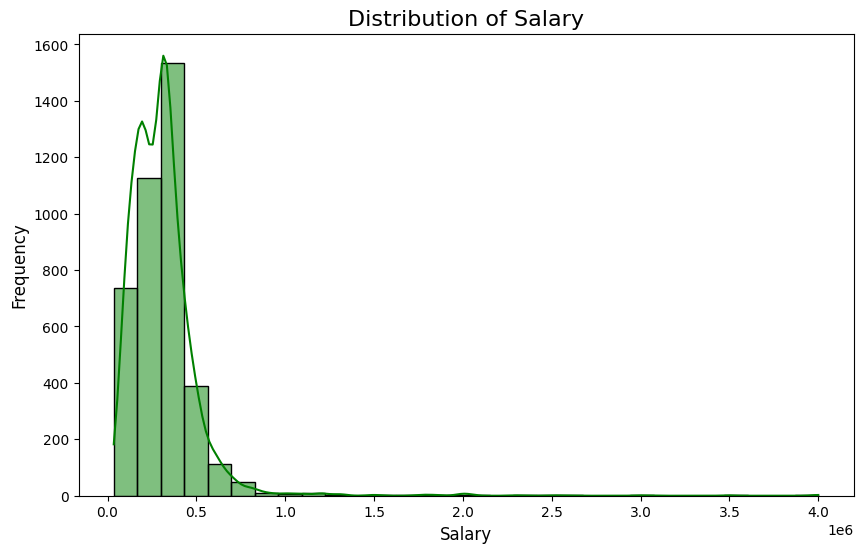

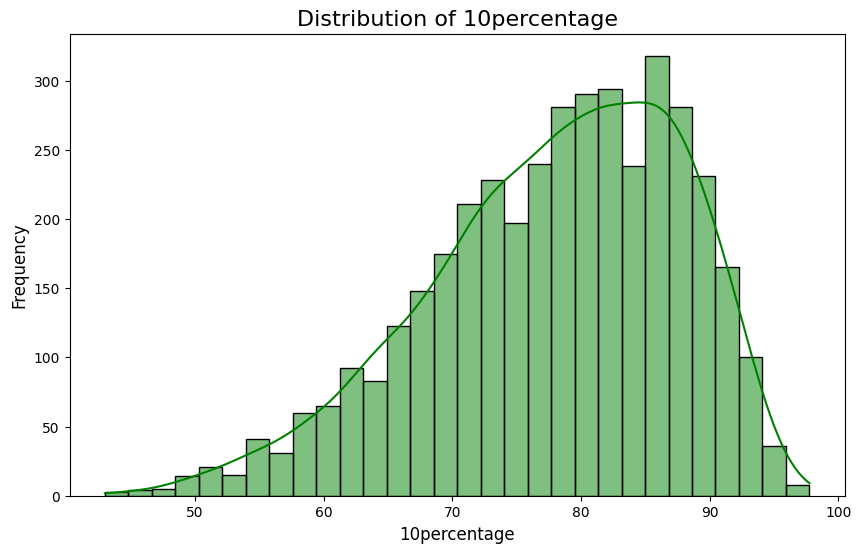

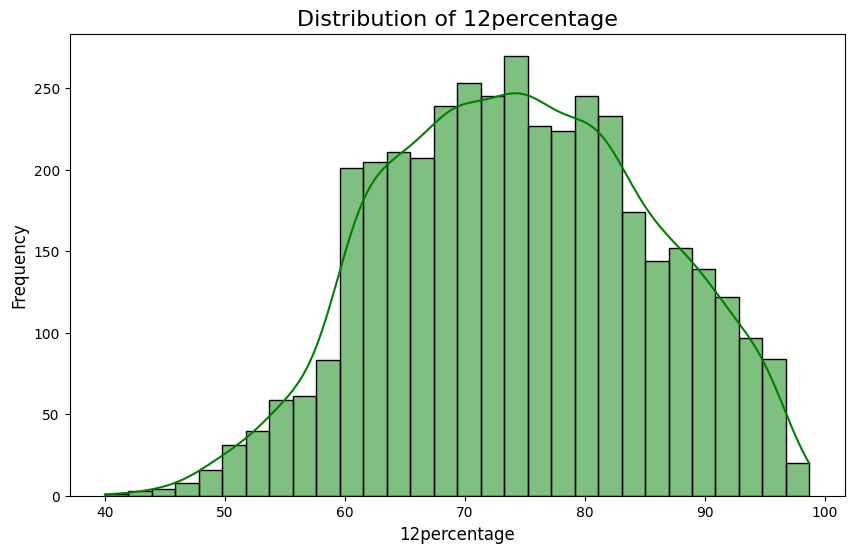

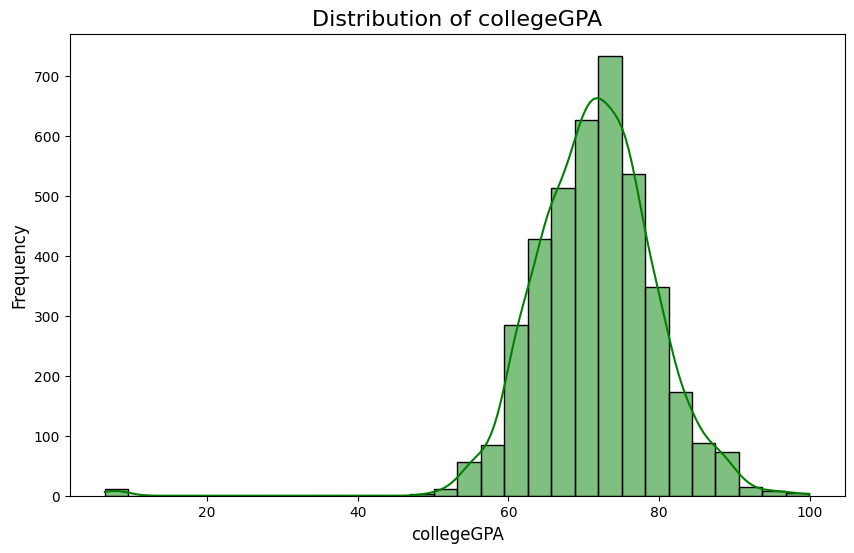

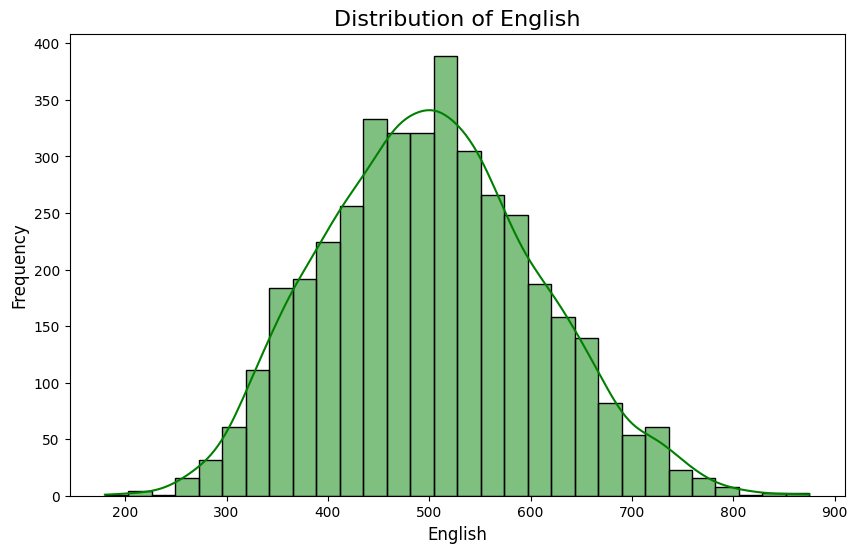

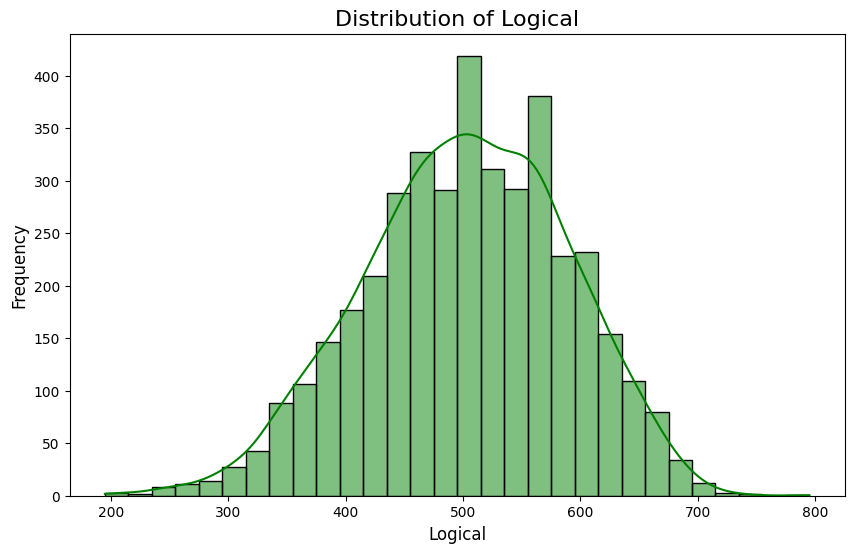

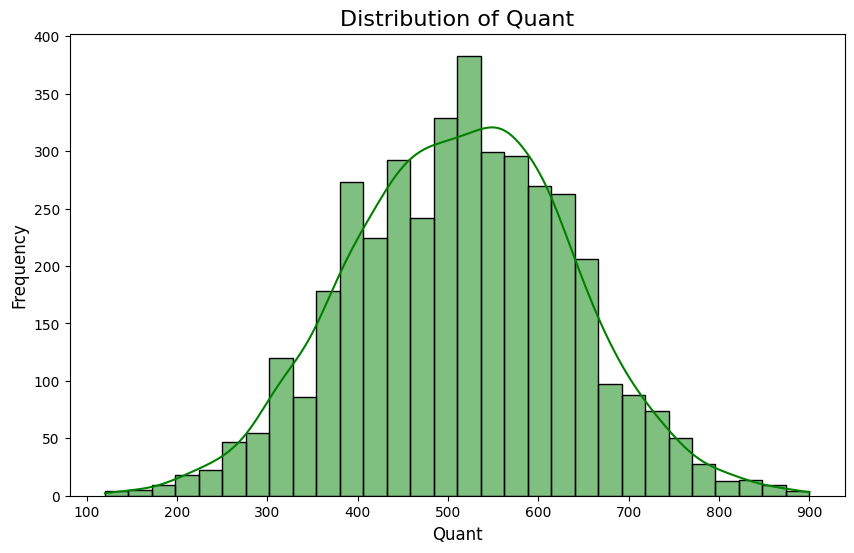

In [41]:
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    # histogram with PDF (KDE)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.show()

**Observations -**

1. Salary- The salary distribution appears right-skewed. Majority of earners are low. The long tail shows their are some high earners.
2. 10%- The distribution of the 10percentage is normal (bell-shaped) but slightly skewed to the left. Most candidates scored between 70% and 90%.
3. 12%- The distribution of 12percentage is also normal, with most scores ranging between 65% and 85%.
4. CGPA- The CollegeGPA distribution appears slightly left-skewed, with a larger number of students scoring in the 6 to 8 GPA.
5. English- The distribution is slightly left-skewed, with the majority of students scoring between 400 and 600.
6. Logical- The distribution is normally distributed, with a concentration of scores between 400 and 600.
7. Quant- This is also normally distributed, with scores concentrated around 500.


**Boxplots for Outliers in Numerical Columns**

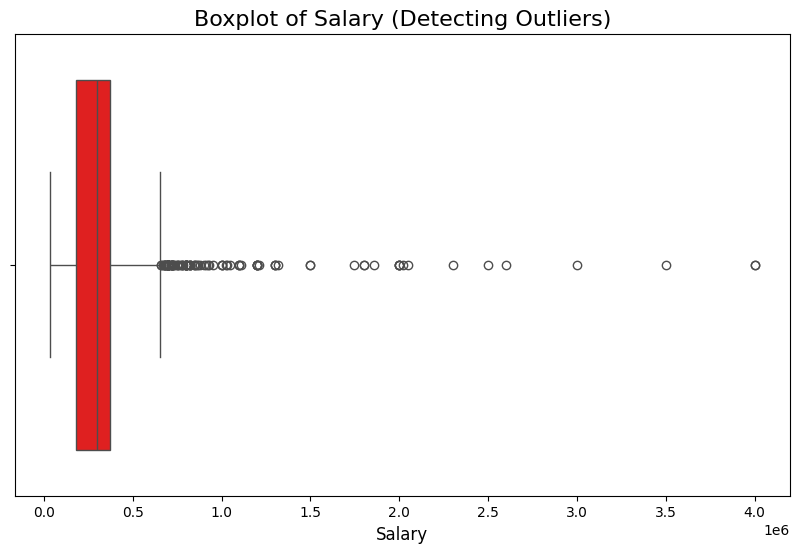

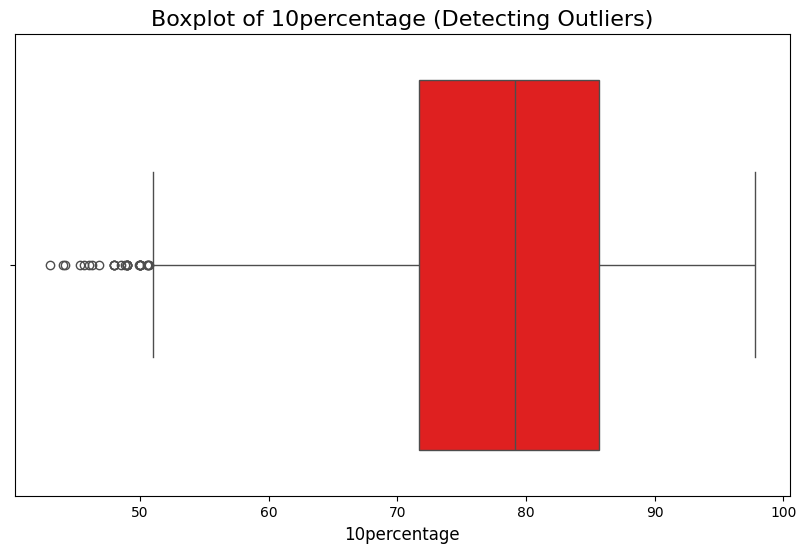

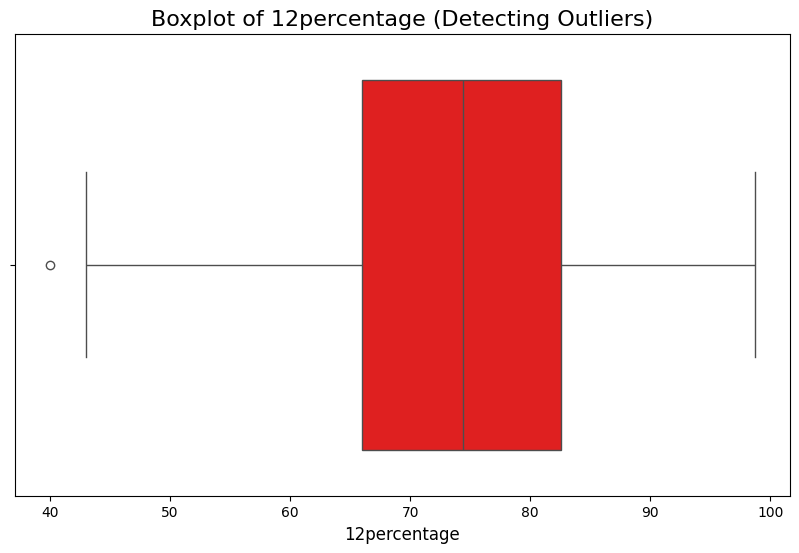

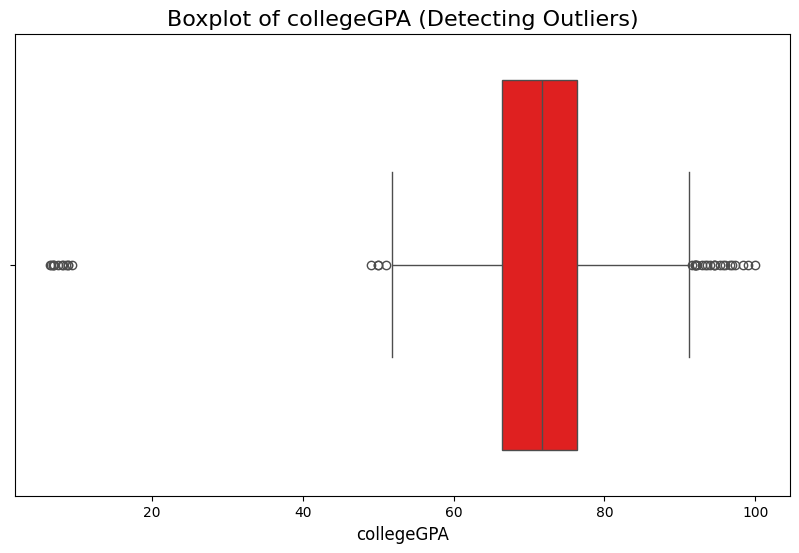

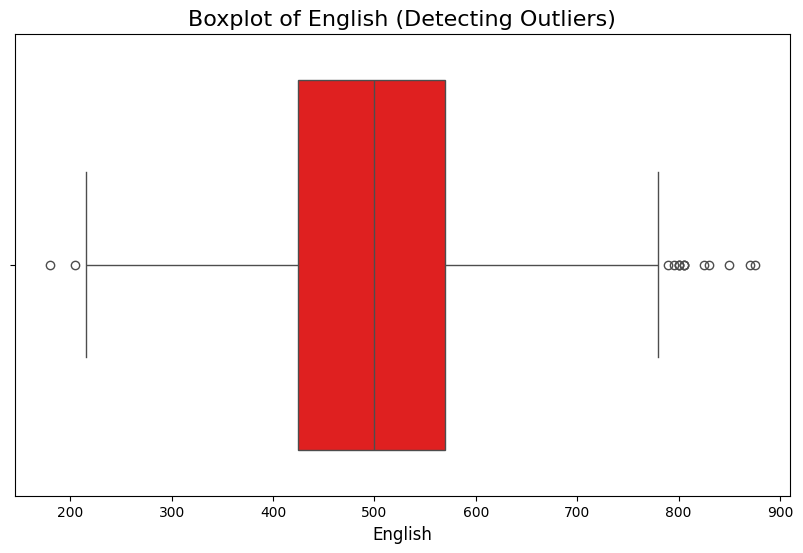

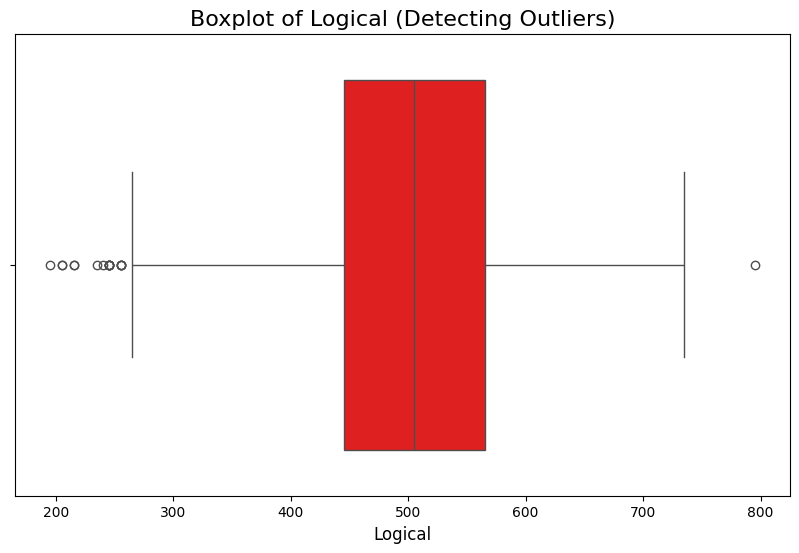

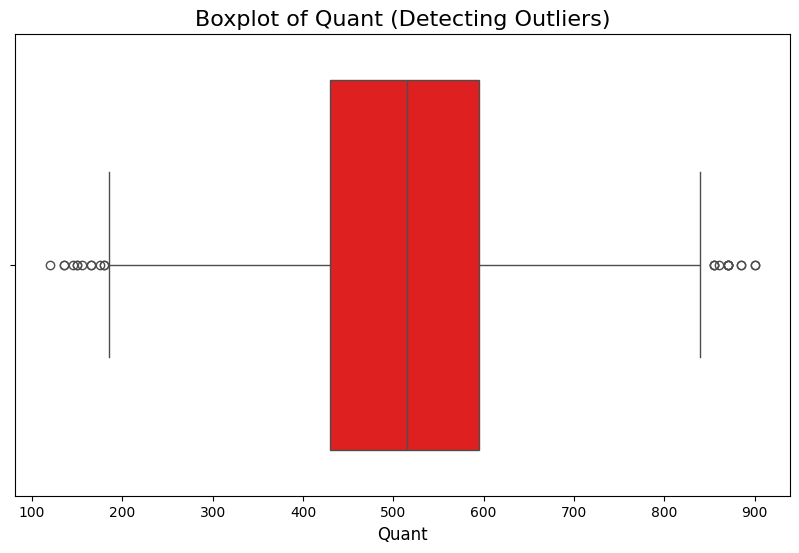

In [42]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=df[col], color='red')

    plt.title(f'Boxplot of {col} (Detecting Outliers)', fontsize=16)
    plt.xlabel(col, fontsize=12)
    
    plt.show()

**Observations -**

Some students scored significantly lower in their 10th or 12th grades and College GPA.

**Countplots for Categorical Columns**

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3204583494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


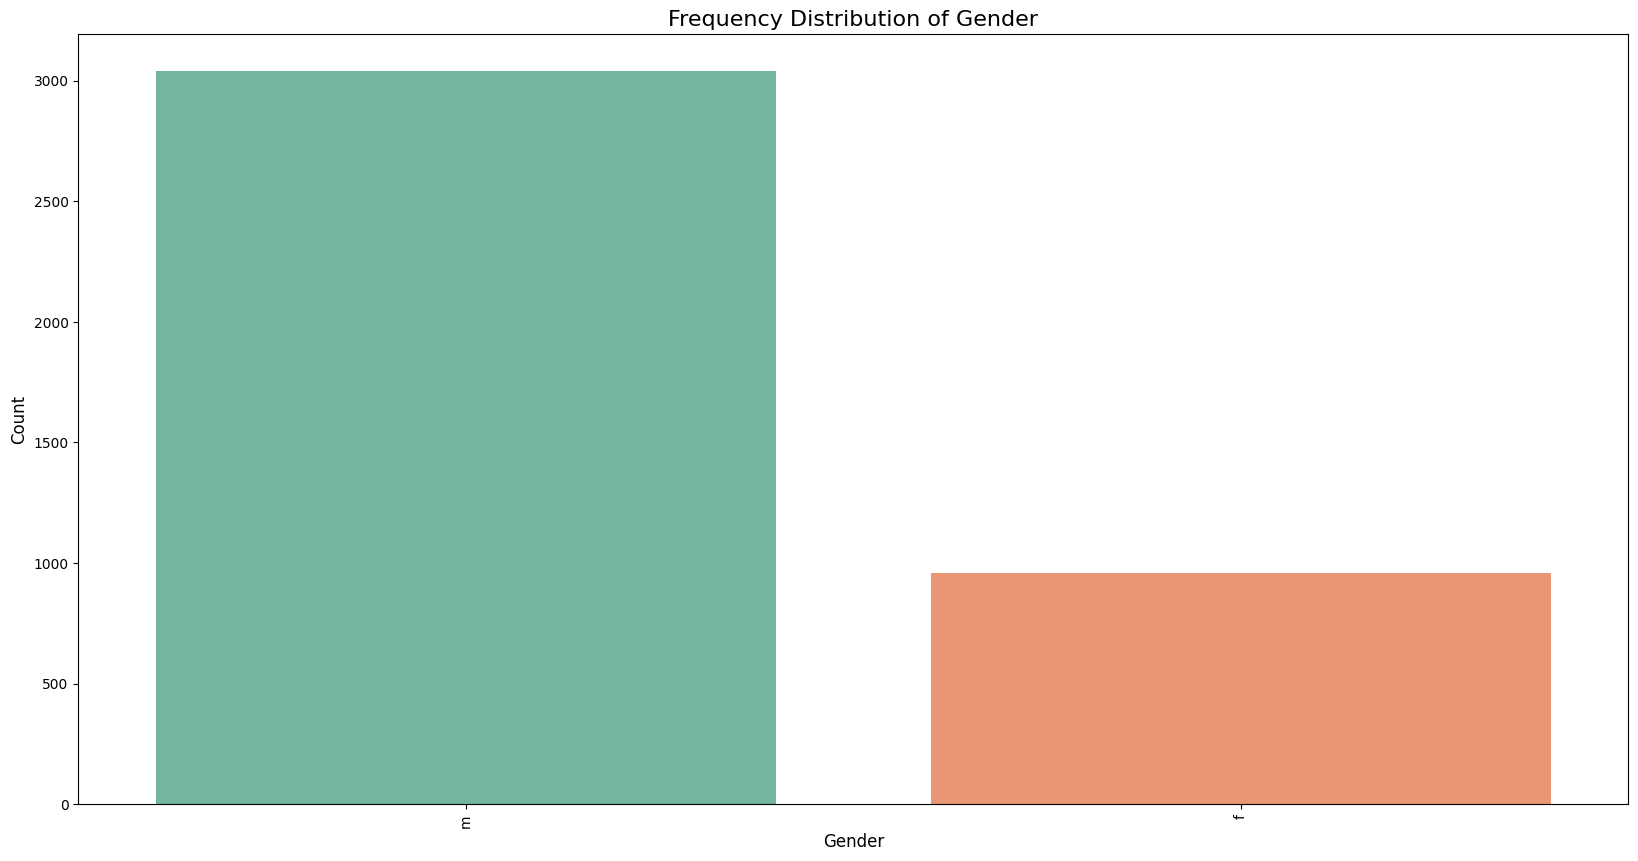

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3204583494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


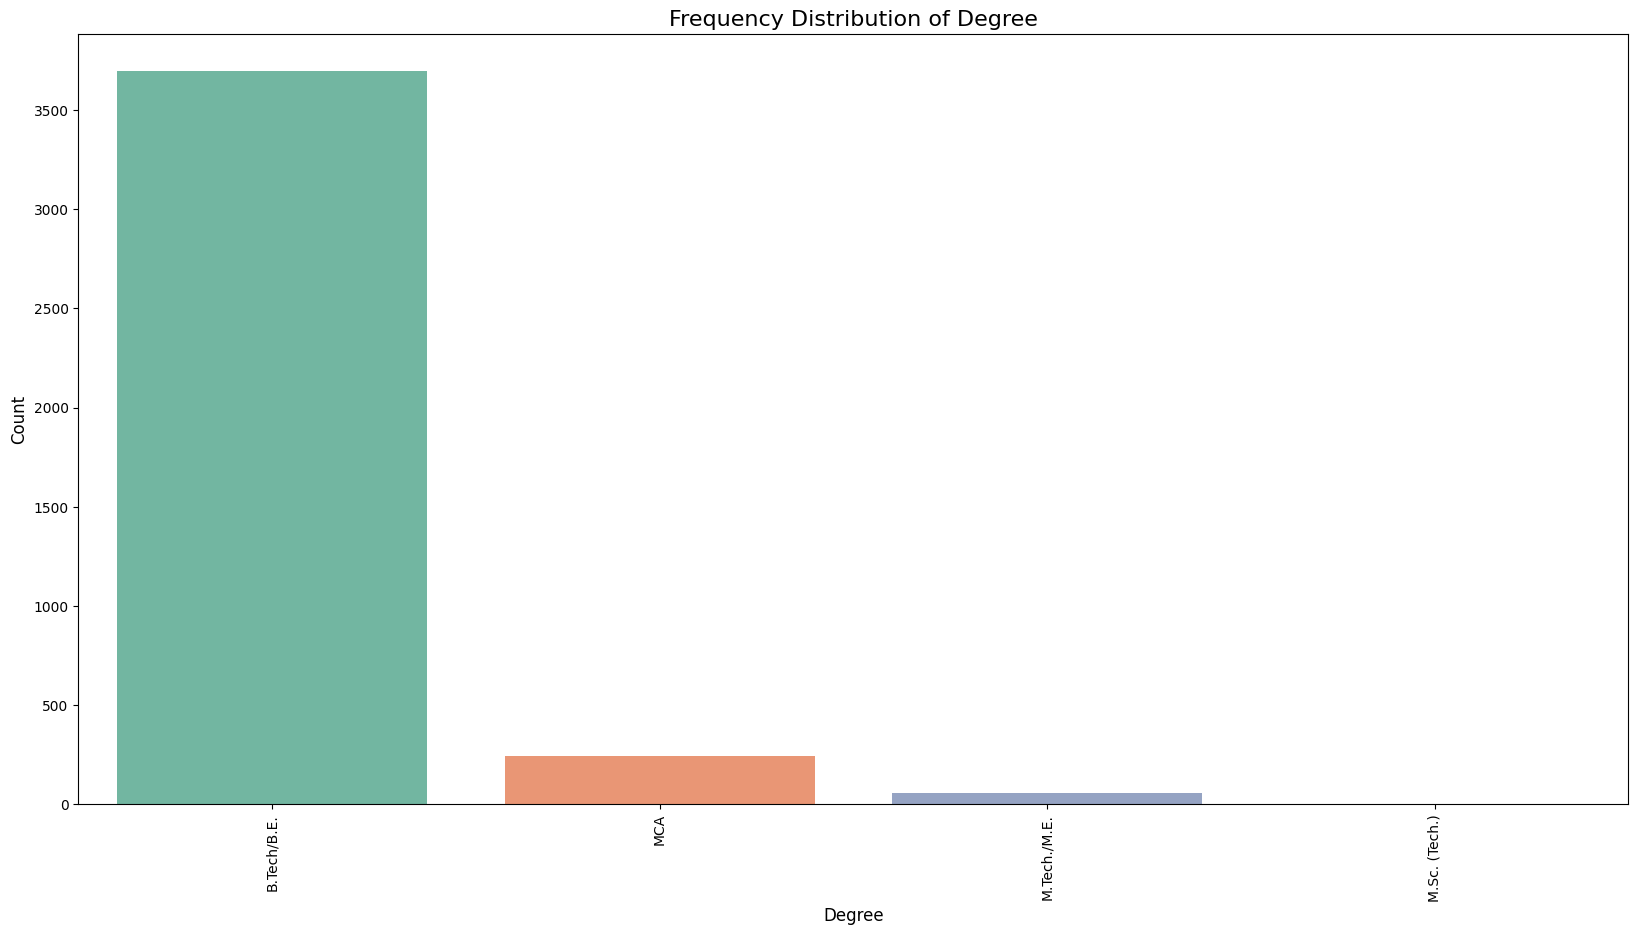

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3204583494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


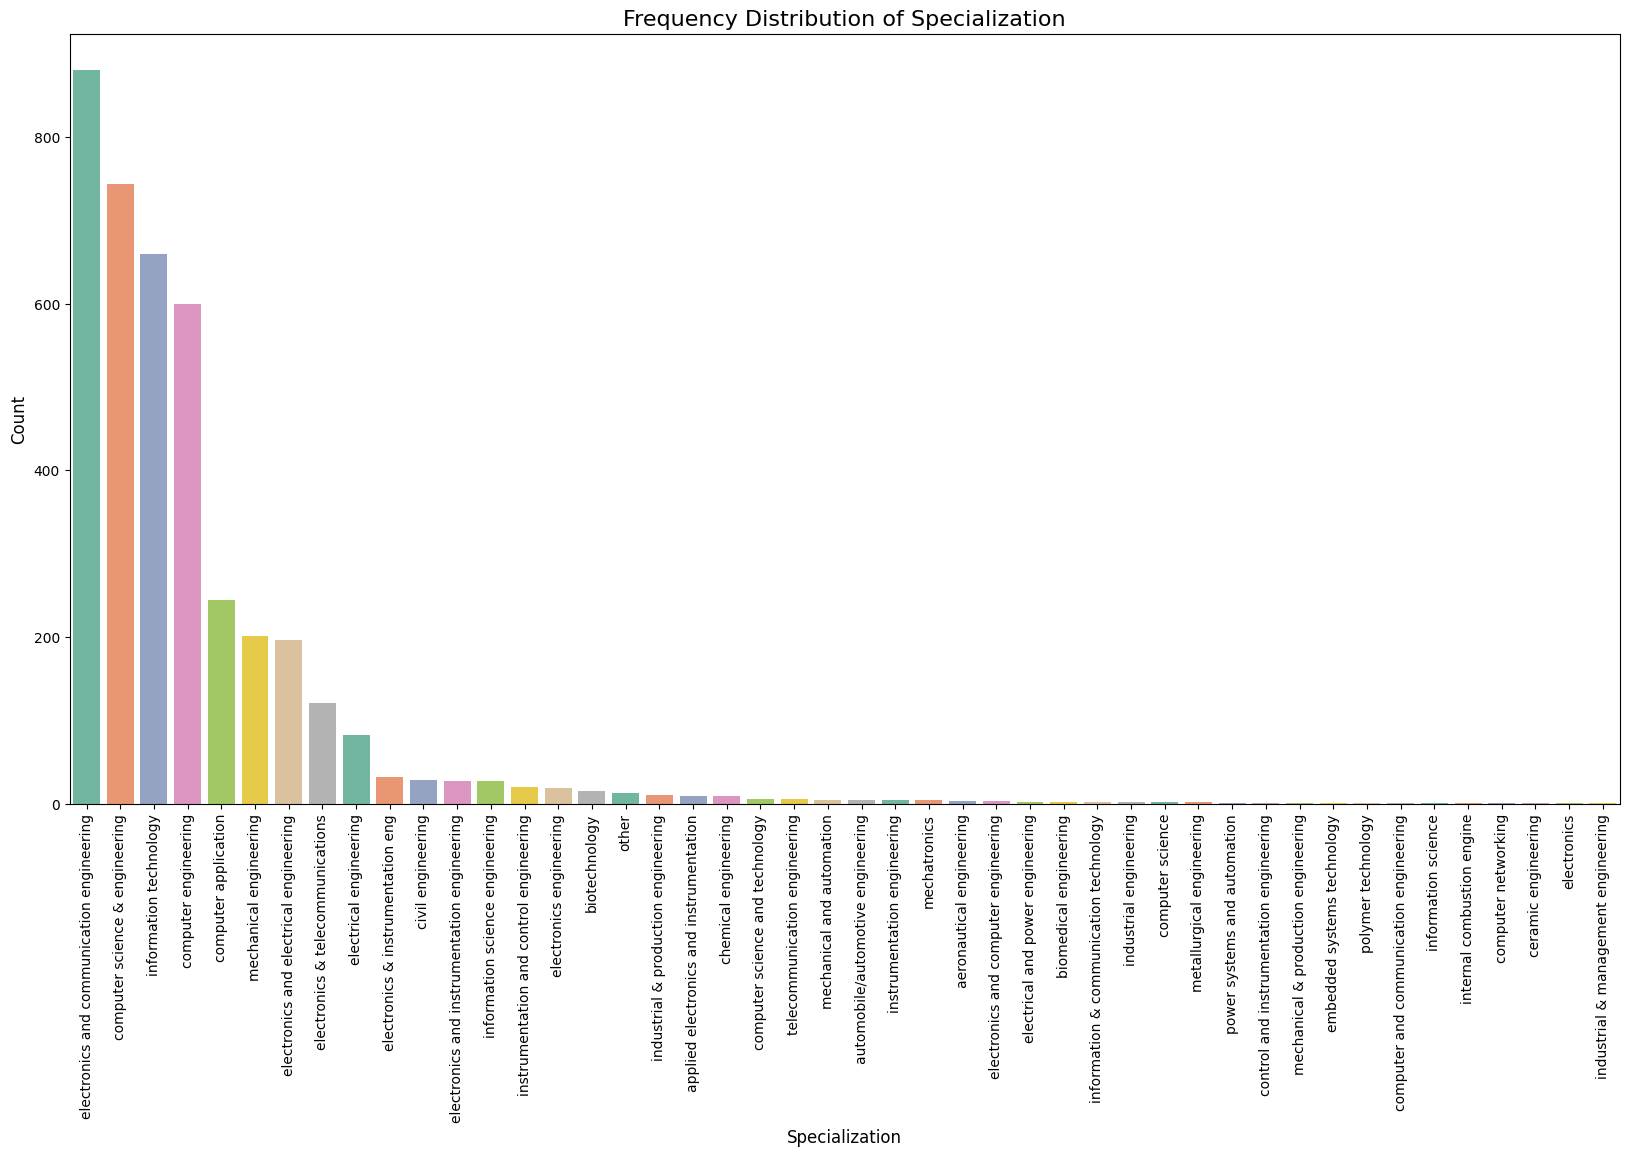

In [43]:
categorical_columns = ['Gender', 'Degree', 'Specialization']

for col in categorical_columns:
    plt.figure(figsize=(20, 10))
    
    sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)
    
    plt.title(f'Frequency Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.xticks(rotation=90)
    
    plt.show()

**Observations -**

Gender:
There are large number of male candidates than female.

Degree:
There are number of BTech/BE candidates

Specialization:
A large number of candidates have a specialization in Electronics and Communication Engineering, followed by Computer Science.
There are fewer candidates in fields like Civil Engineering and Textile Engineering.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3658673523.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobCity', data=df[df['JobCity'].isin(top_10)], palette='Set3')


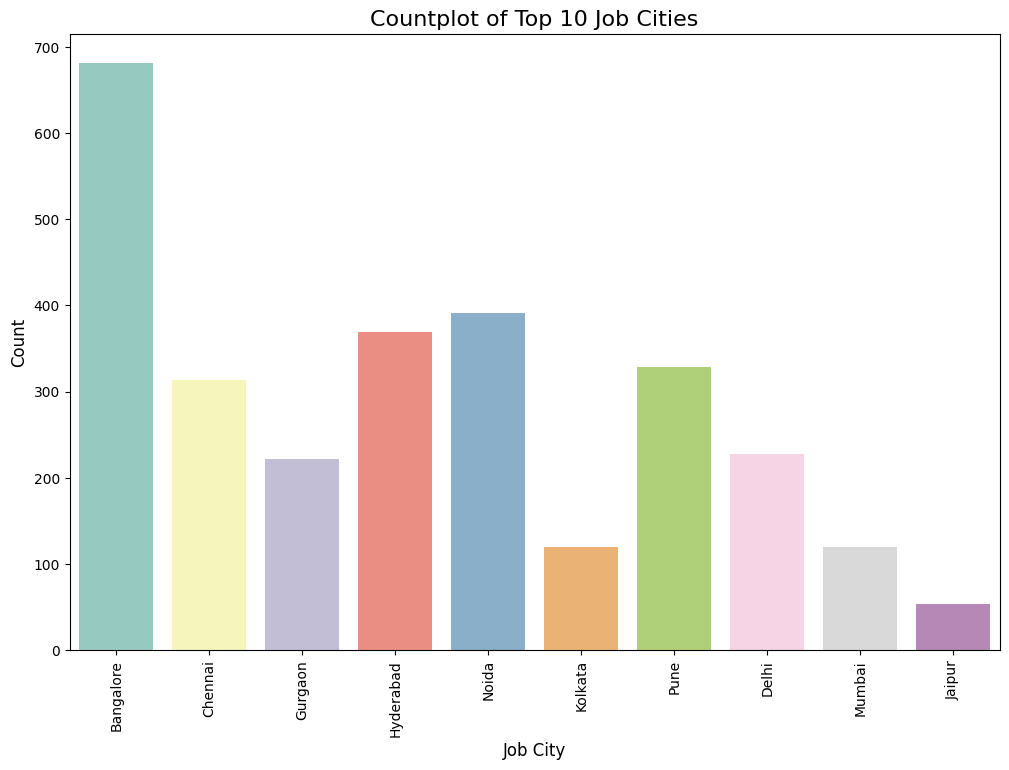

In [44]:
top_10 = df['JobCity'].value_counts().head(10).index

plt.figure(figsize=(12, 8))

sns.countplot(x='JobCity', data=df[df['JobCity'].isin(top_10)], palette='Set3')

plt.xticks(rotation=90)

plt.title('Countplot of Top 10 Job Cities', fontsize=16)
plt.xlabel('Job City', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\2206057927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Designation', data=df[df['Designation'].isin(top_20)], palette='Set3')


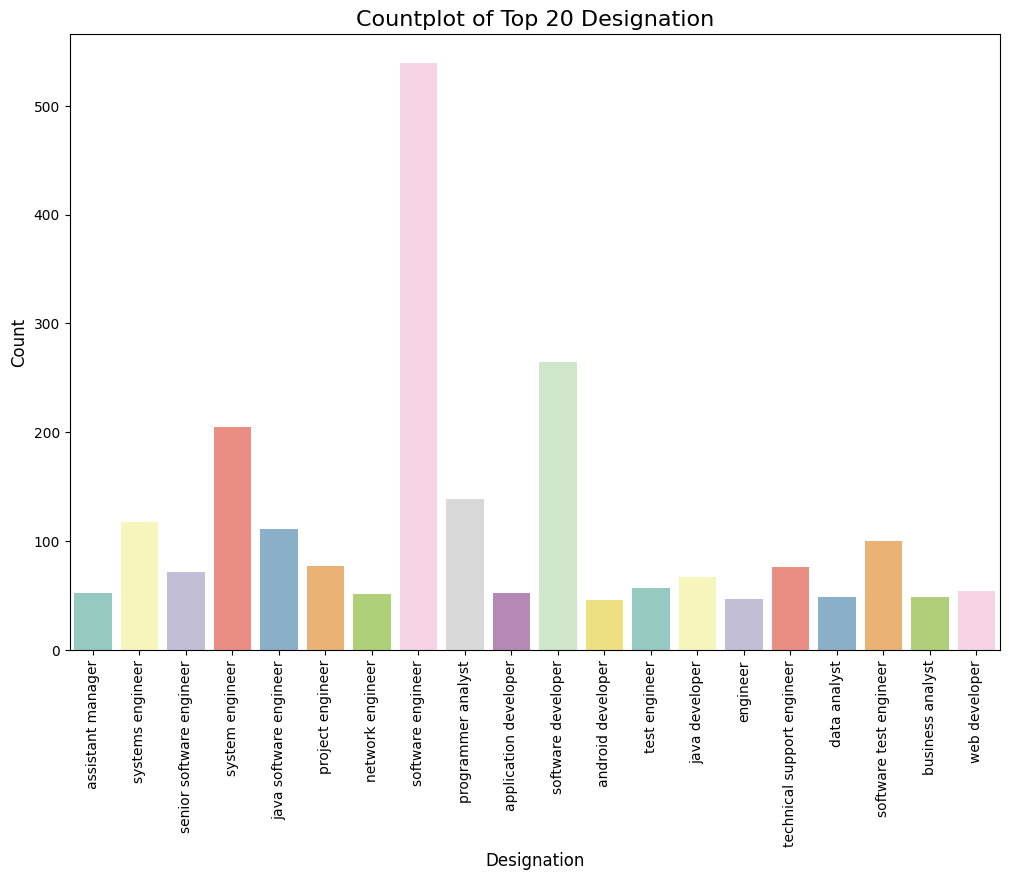

In [45]:
top_20 = df['Designation'].value_counts().head(20).index

plt.figure(figsize=(12, 8))

sns.countplot(x='Designation', data=df[df['Designation'].isin(top_20)], palette='Set3')

plt.xticks(rotation=90)

plt.title('Countplot of Top 20 Designation', fontsize=16)
plt.xlabel('Designation', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

**Bivariate Analysis**

**Scatter Plots for relationships between Salary and other numerical columns**

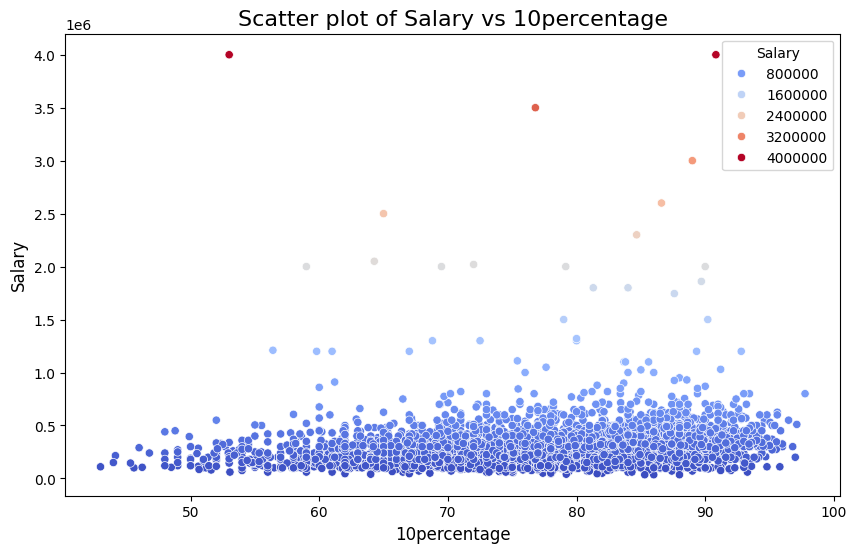

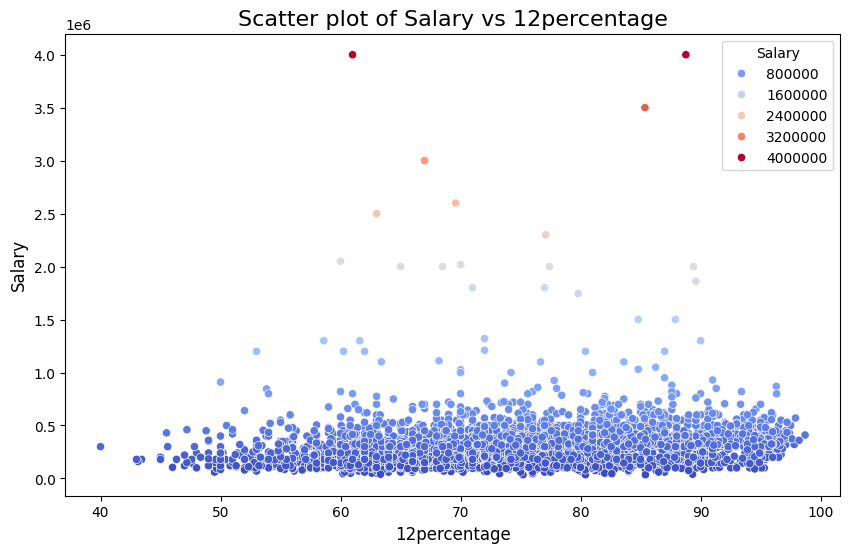

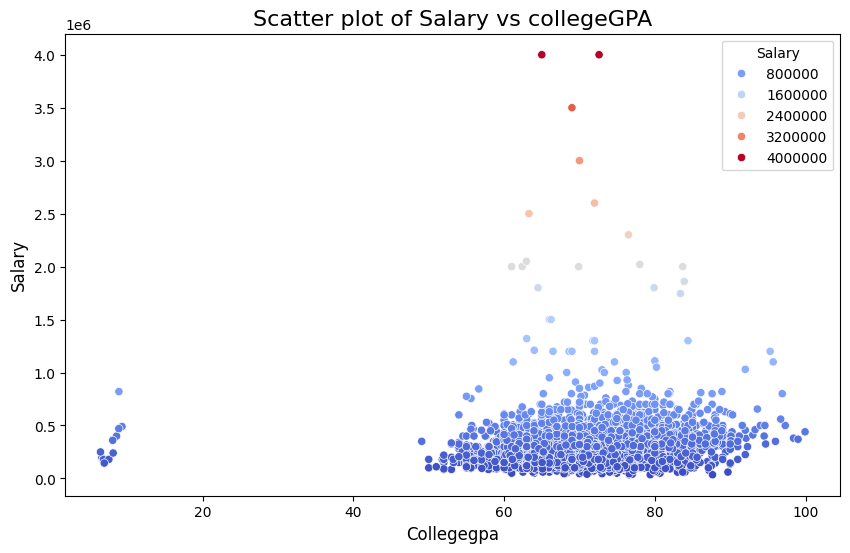

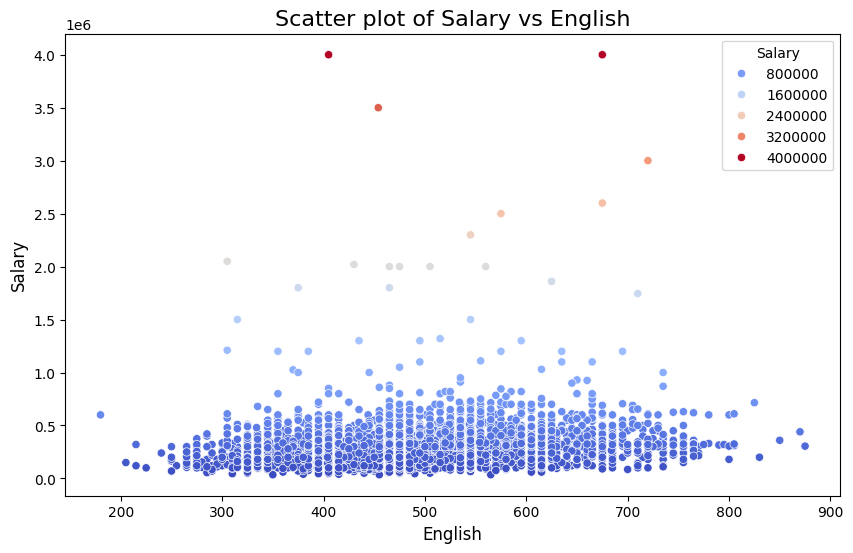

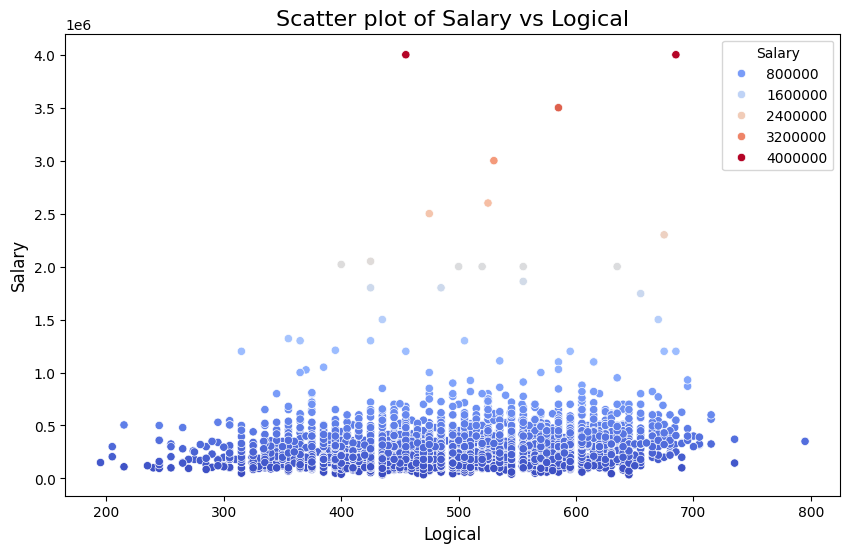

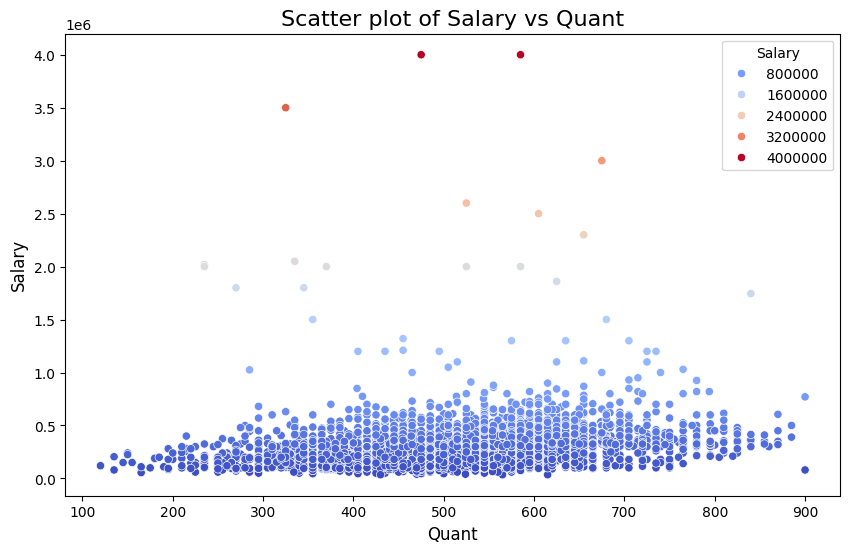

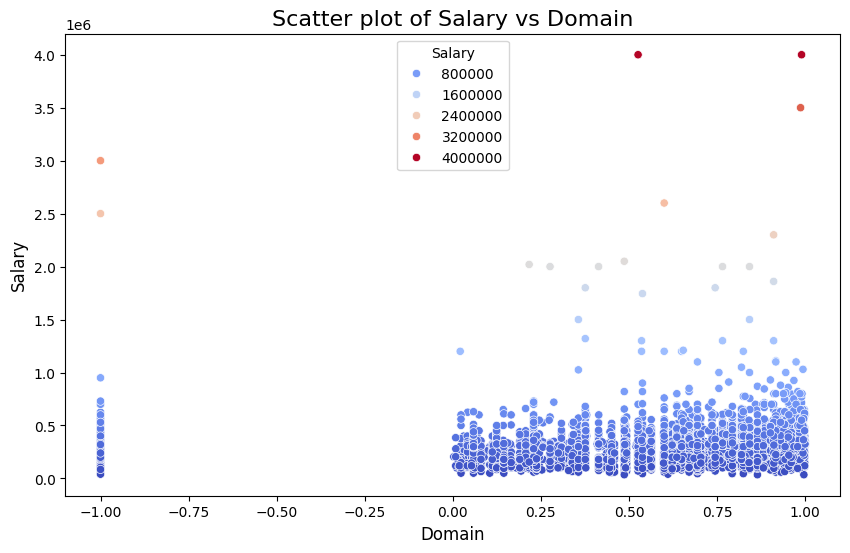

In [46]:
numerical_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='Salary', data=df, hue='Salary', palette='coolwarm')
    
    plt.title(f'Scatter plot of Salary vs {col}', fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Salary', fontsize=12)
    plt.show()

**Hexbin Plots**

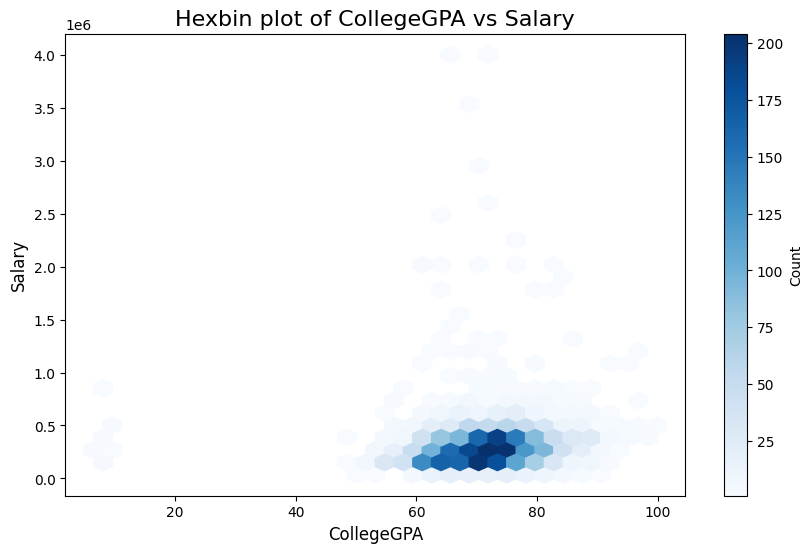

In [47]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegeGPA'], df['Salary'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('CollegeGPA', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.title('Hexbin plot of CollegeGPA vs Salary', fontsize=16)
plt.show()

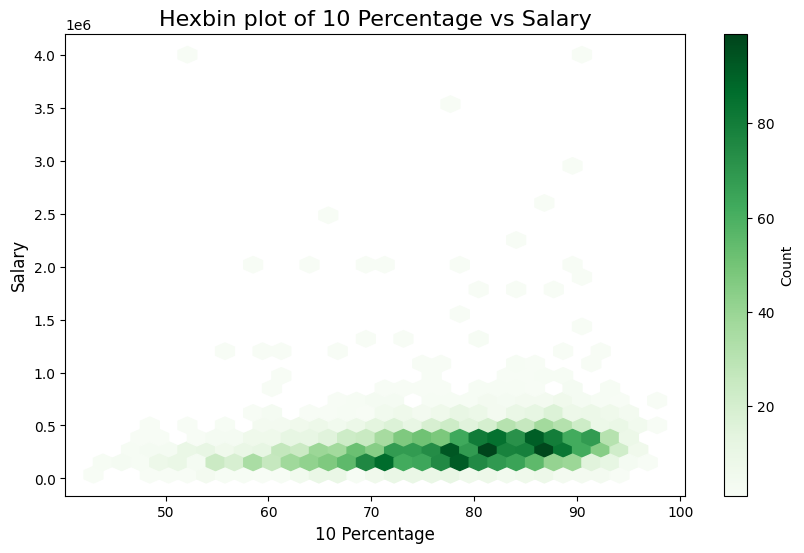

In [48]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['10percentage'], df['Salary'], gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('10 Percentage', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.title('Hexbin plot of 10 Percentage vs Salary', fontsize=16)
plt.show()

**PairPlots**

In [49]:
# Pairplot
# sns.pairplot(df[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming','ComputerScience']])
# plt.show()


**Swarmplot for Categorical Vs Numerical**

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\2219423661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Specialization', y='Salary', data=df[df['Specialization'].isin(top_20)], palette='Set2')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.5% of the points can

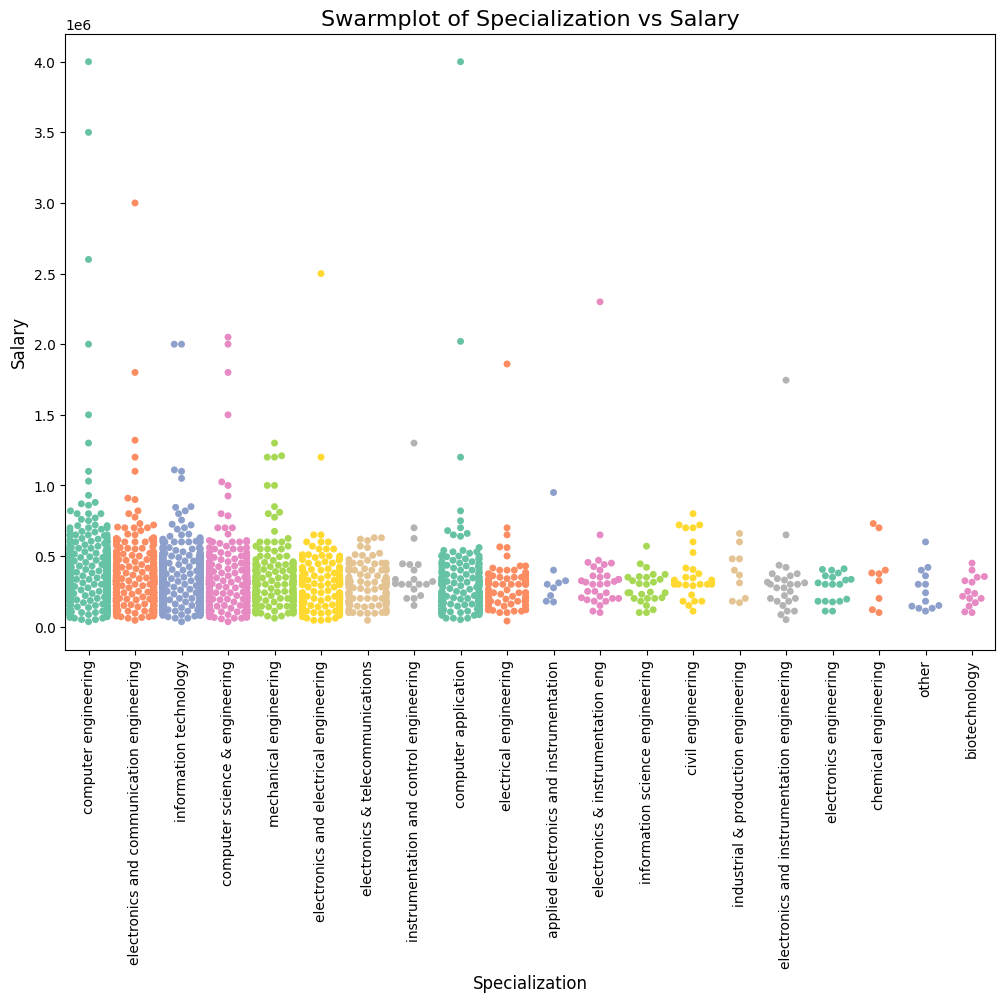

In [50]:
top_20 = df['Specialization'].value_counts().head(20).index

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Specialization', y='Salary', data=df[df['Specialization'].isin(top_20)], palette='Set2')
plt.xticks(rotation=90)
plt.title('Swarmplot of Specialization vs Salary', fontsize=16)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3382967377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_20)], palette='Set2')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be

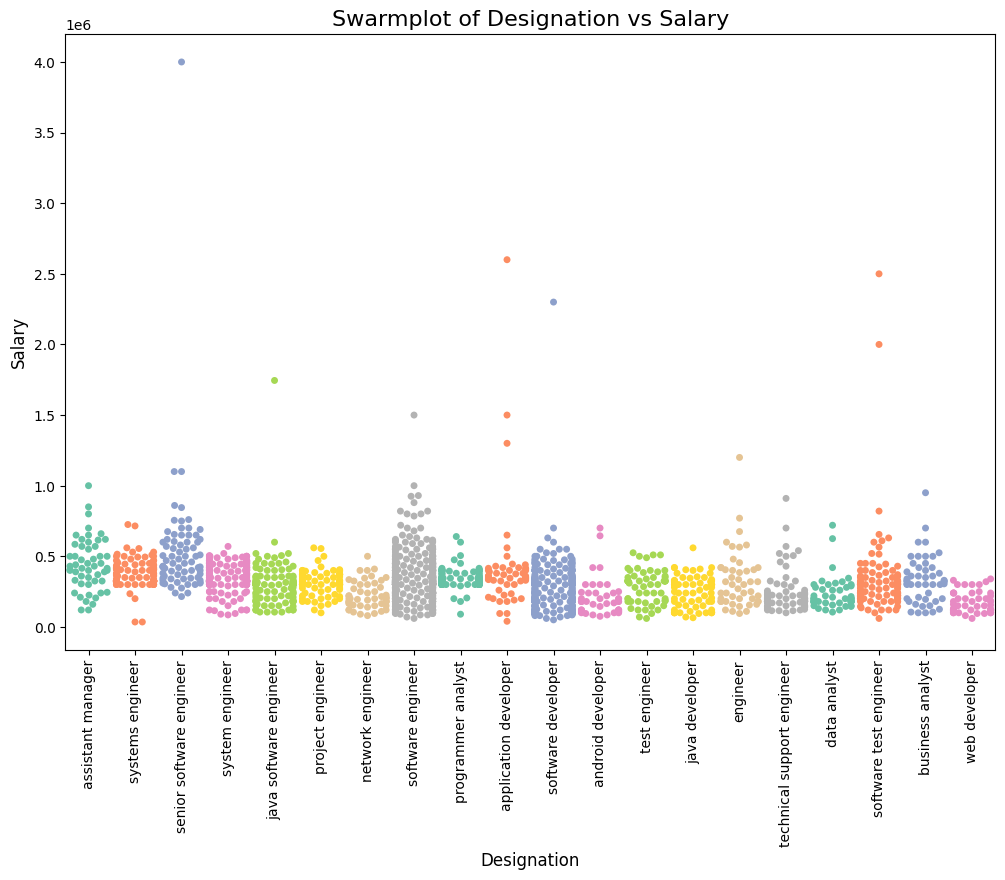

In [51]:
top_20 = df['Designation'].value_counts().head(20).index

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_20)], palette='Set2')
plt.xticks(rotation=90)
plt.title('Swarmplot of Designation vs Salary', fontsize=16)
plt.xlabel('Designation', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\2543059425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='JobCity', y='Salary', data=df[df['JobCity'].isin(top_20)], palette='Set2')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.2% of the points cannot be placed;

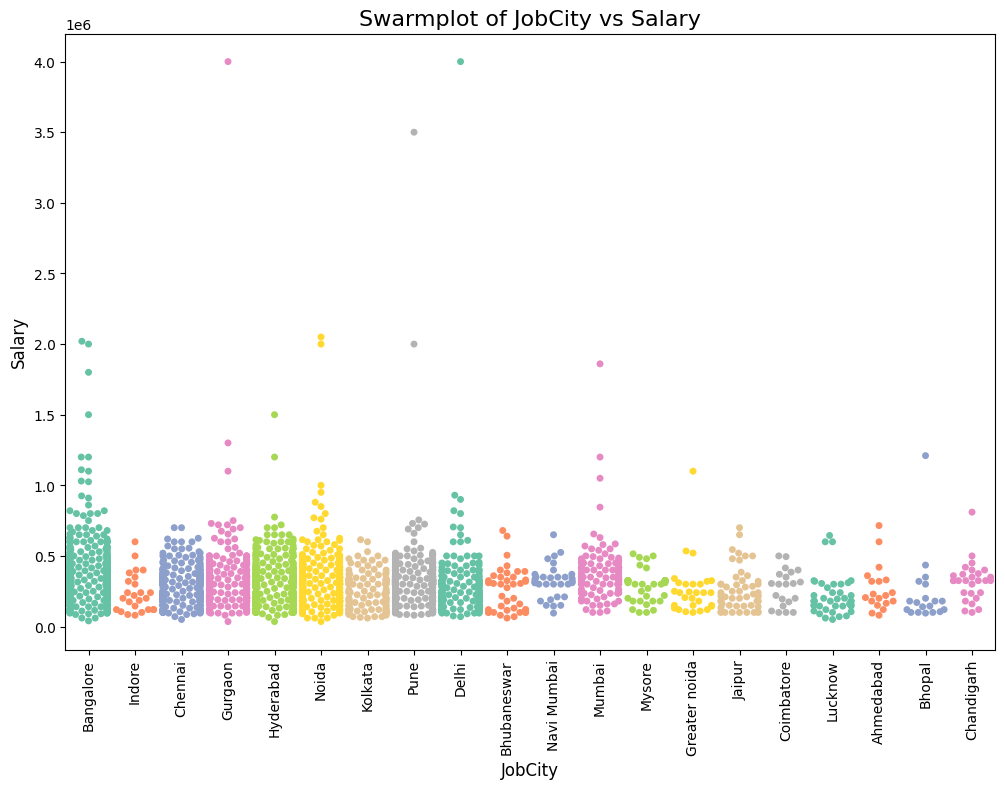

In [52]:
top_20 = df['JobCity'].value_counts().head(20).index

plt.figure(figsize=(12, 8))
sns.swarmplot(x='JobCity', y='Salary', data=df[df['JobCity'].isin(top_20)], palette='Set2')
plt.xticks(rotation=90)
plt.title('Swarmplot of JobCity vs Salary', fontsize=16)
plt.xlabel('JobCity', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

**Boxplot for Categorical Vs Numerical**

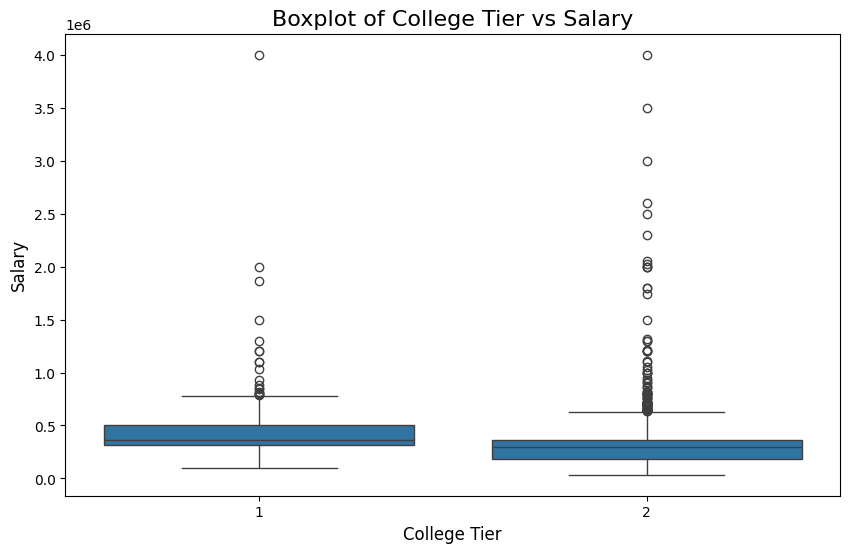

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CollegeTier', y='Salary', data=df)
plt.title('Boxplot of College Tier vs Salary', fontsize=16)
plt.xlabel('College Tier', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

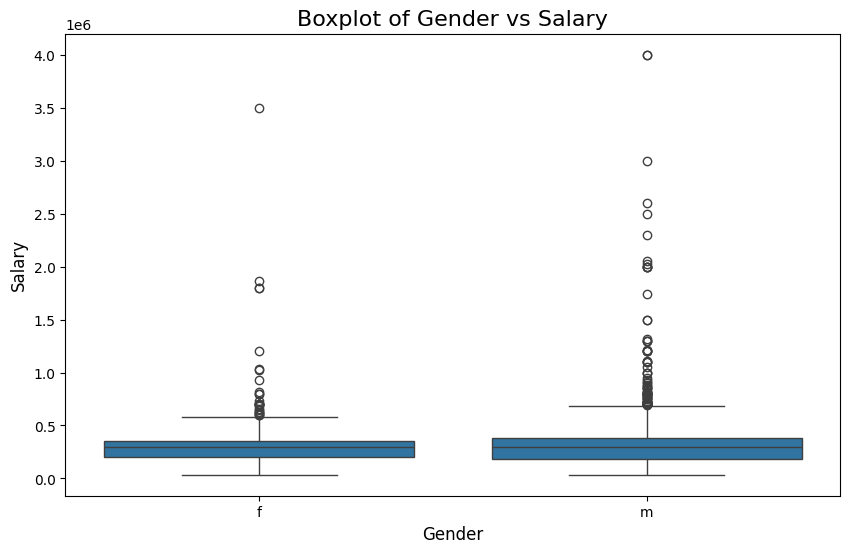

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Boxplot of Gender vs Salary', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

**Barplot for Categorical Vs Numerical**

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3355751318.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_20)], ci=None, palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3355751318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_20)], ci=None, palette='Set1')


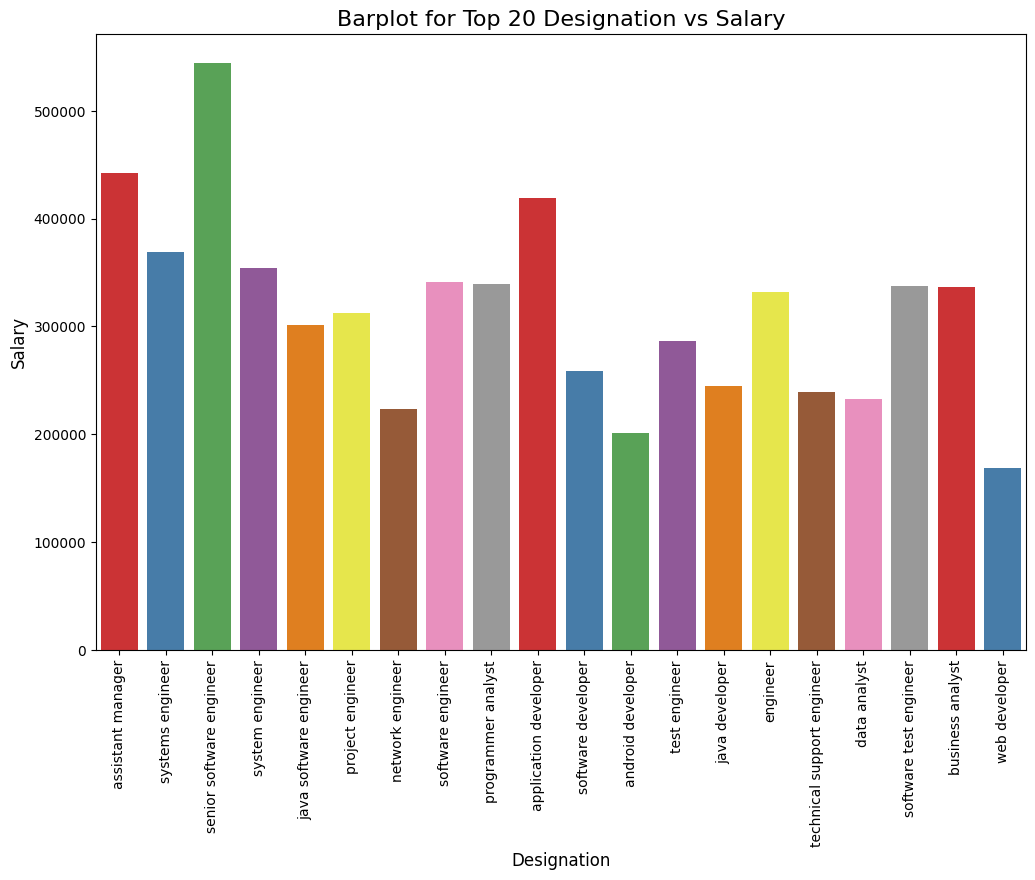

In [54]:
top_20 = df['Designation'].value_counts().head(20).index

plt.figure(figsize=(12, 8))
sns.barplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_20)], ci=None, palette='Set1')
plt.xticks(rotation=90)
plt.title('Barplot for Top 20 Designation vs Salary', fontsize=16)
plt.xlabel('Designation', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

**Observation -**

Software Engineers generally have higher salary offers.
Candidates in roles like Associate Engineer or Graduate Engineer Trainee are offered relatively lower salaries.
The salary is higher for System Engineers and Analysts, with some receiving much higher offers than others.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\46533083.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Specialization', y='Salary', data=df, ci=None, palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\46533083.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Specialization', y='Salary', data=df, ci=None, palette='Set1')


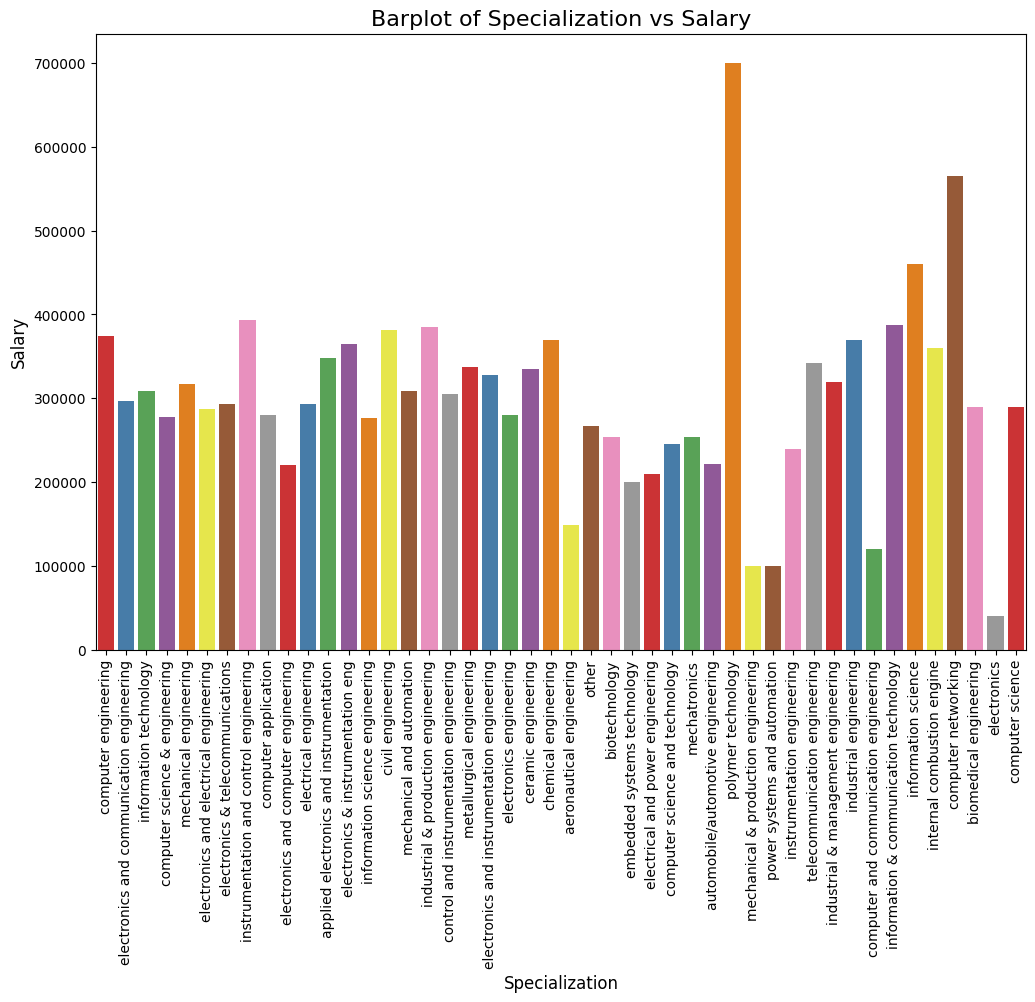

In [55]:
# top_30 = df['Specialization'].value_counts().head(30).index

plt.figure(figsize=(12, 8))
sns.barplot(x='Specialization', y='Salary', data=df, ci=None, palette='Set1')
plt.xticks(rotation=90)
plt.title('Barplot of Specialization vs Salary', fontsize=16)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\384779271.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Degree', y='Salary', data=df, estimator='mean', ci=None, palette='YlGnBu')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\384779271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Degree', y='Salary', data=df, estimator='mean', ci=None, palette='YlGnBu')


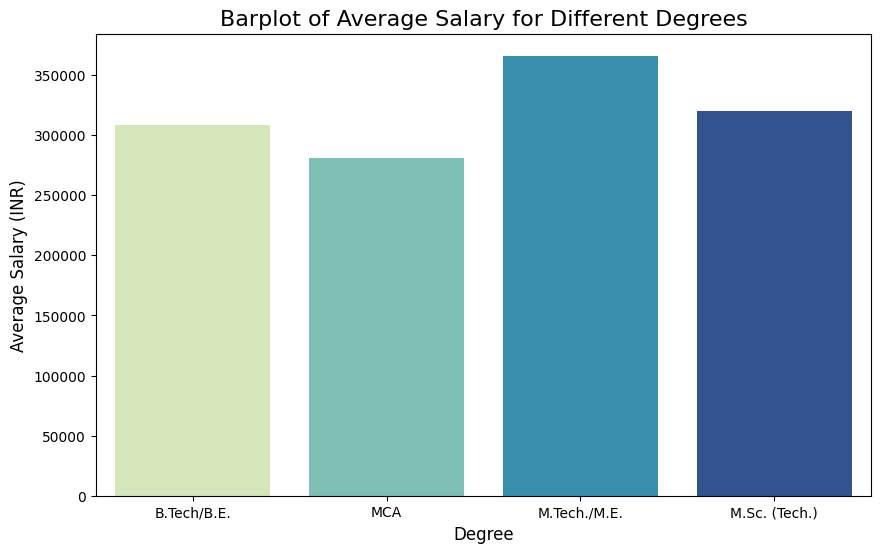

In [56]:
# Barplot of average salary for different degrees
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=df, estimator='mean', ci=None, palette='YlGnBu')

plt.title('Barplot of Average Salary for Different Degrees', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Average Salary (INR)', fontsize=12)
# plt.xticks(rotation=90)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3444223153.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=df, estimator='mean', ci=None, palette='Set1')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17040\3444223153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=df, estimator='mean', ci=None, palette='Set1')


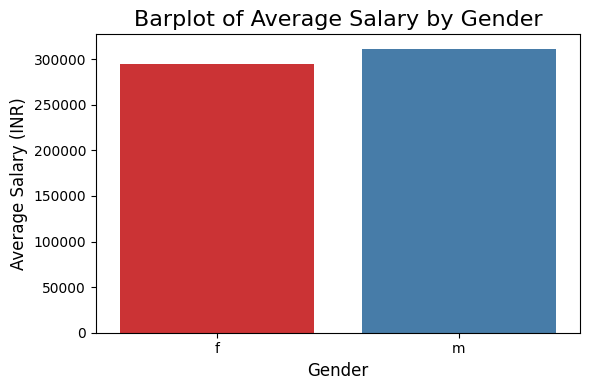

In [72]:
# Barplot of average salary for gender

plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Salary', data=df, estimator='mean', ci=None, palette='Set1')

plt.title('Barplot of Average Salary by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Salary (INR)', fontsize=12)
plt.tight_layout()

plt.show()

**Stacked Barplot for Categorical Vs Categorical**

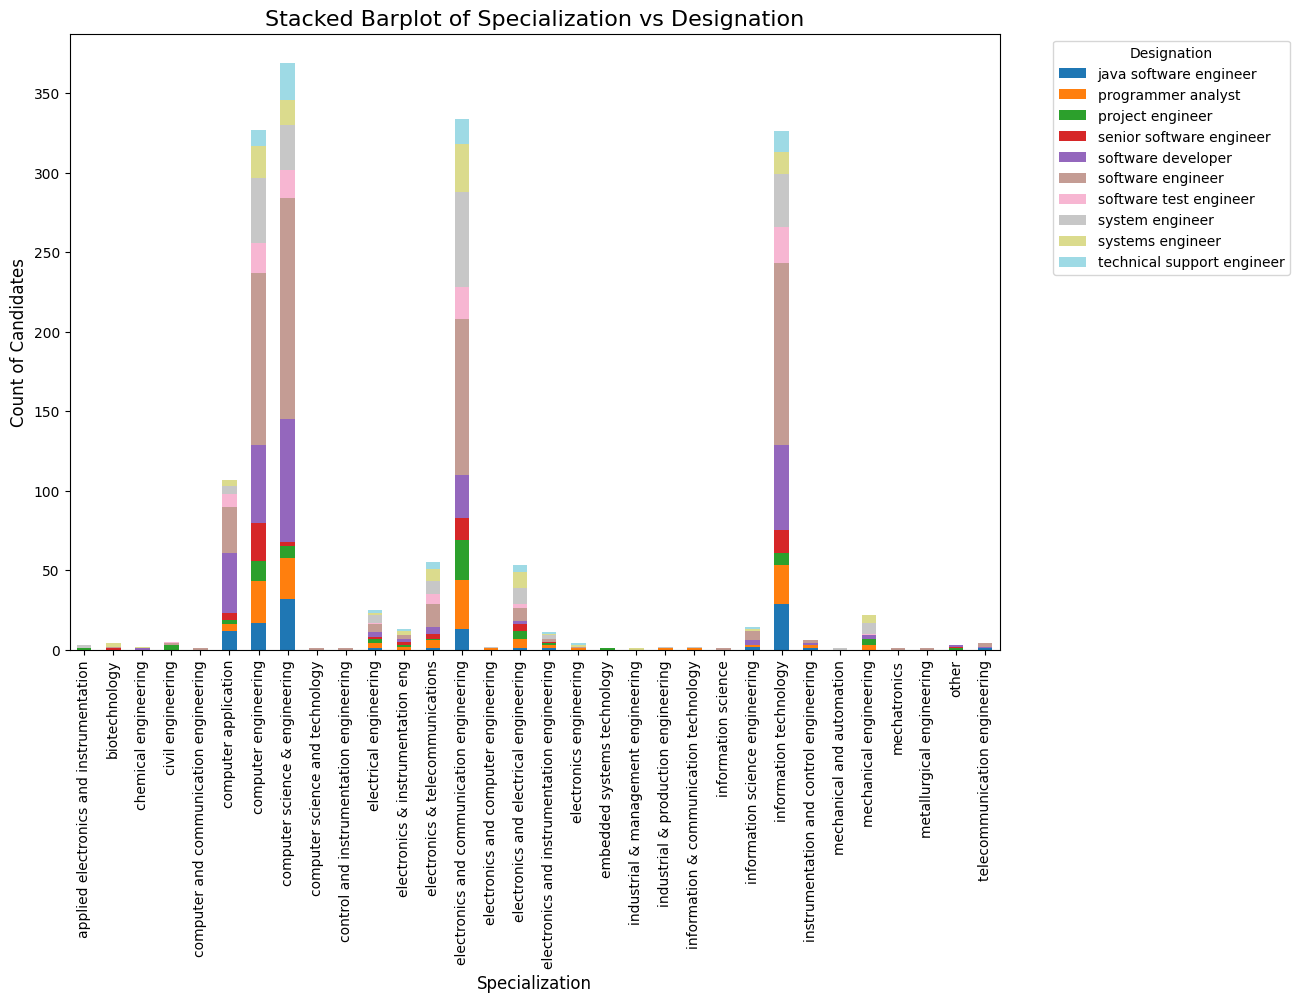

In [58]:
top_10 = df['Designation'].value_counts().head(10).index
filter_df=df[df['Designation'].isin(top_10)]

cross_tab = pd.crosstab(df['Specialization'], filter_df['Designation'] )

# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Stacked Barplot of Specialization vs Designation', fontsize=16)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Count of Candidates', fontsize=12)
plt.legend(title='Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()

**Observation -**

The Electronics and Communication specialization have a wide range of designations, including System Engineer, Software Engineer, and Graduate Engineer Trainee.

Computer Science candidates shows dominance in Software Engineer roles.

Specializations like Civil Engineering have fewer designations.

**Research Questions**

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**

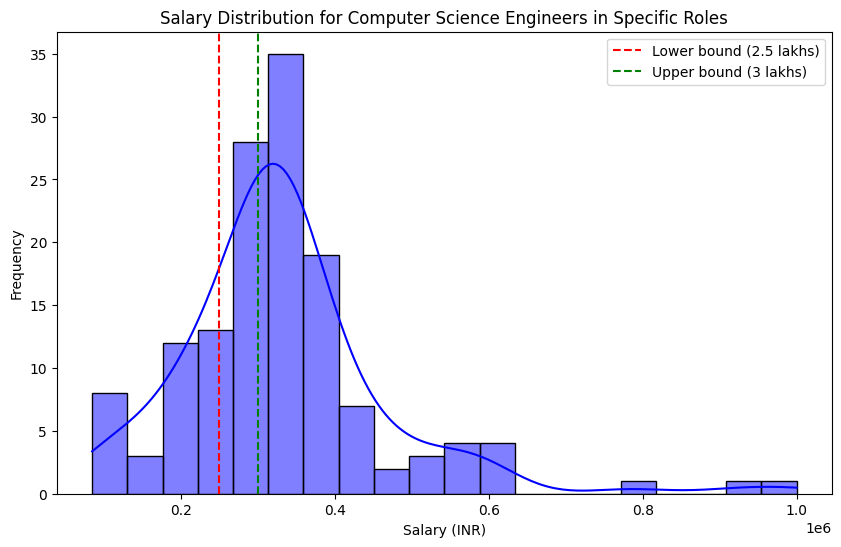

Mean Salary: 332943.26241134753
Median Salary: 315000.0
Standard Deviation of Salary: 136456.52227774894
T-Statistic: 5.042178329232856, P-Value: 1.4010493708138015e-06
We reject the null hypothesis. The mean salary is significantly different from 2.75 lakhs.


In [59]:
from scipy import stats

cs_data = df[df['Specialization'] == 'computer science & engineering']

roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
cs_roles_data = cs_data[cs_data['Designation'].isin(roles)]

mean_salary = cs_roles_data['Salary'].mean()
median_salary = cs_roles_data['Salary'].median()
std_salary = cs_roles_data['Salary'].std()

# plot
plt.figure(figsize=(10, 6))
sns.histplot(cs_roles_data['Salary'], kde=True, bins=20, color='blue')
plt.axvline(x=2.5e5, color='red', linestyle='--', label='Lower bound (2.5 lakhs)')
plt.axvline(x=3e5, color='green', linestyle='--', label='Upper bound (3 lakhs)')
plt.title('Salary Distribution for Computer Science Engineers in Specific Roles')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Hypothesis testing
#one-sample t-test against the mean salary of 2.75 lakhs
t_stat, p_value = stats.ttest_1samp(cs_roles_data['Salary'], 2.75e5)

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Standard Deviation of Salary: {std_salary}")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

#result based on p-value
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. The mean salary is significantly different from 2.75 lakhs.")
else:
    print("We fail to reject the null hypothesis. The mean salary is not significantly different from 2.75 lakhs.")


**Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)**

<Figure size 1200x800 with 0 Axes>

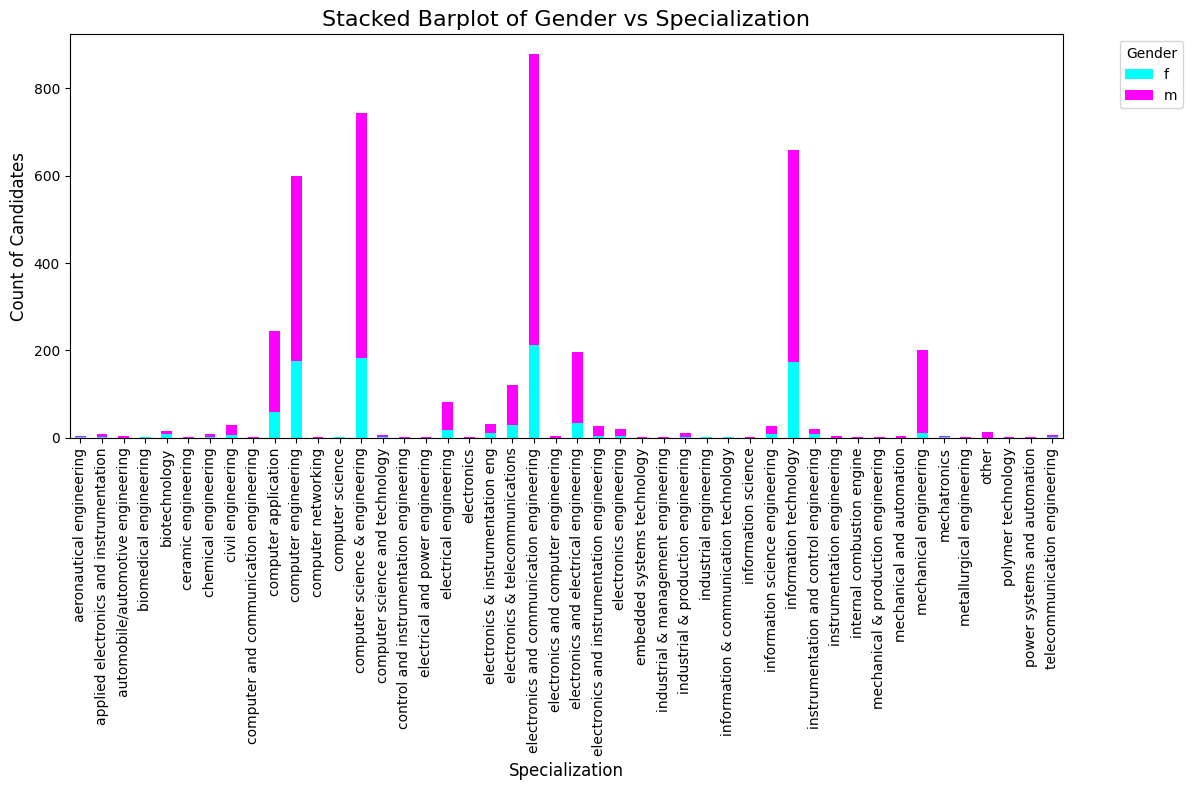

In [60]:
gen_spec = pd.crosstab(df['Specialization'], df['Gender'])

# stacked barplot
plt.figure(figsize=(12, 8))
gen_spec.plot(kind='bar', stacked=True, colormap='cool', figsize=(12, 8))

plt.title('Stacked Barplot of Gender vs Specialization', fontsize=16)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Count of Candidates', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

**Observations -**

Specializations such as Computer Science & Engineering and Information Technology have a higher proportion of male candidates.
Specializations like Electrical Engineering and Mechanical Engineering also show a large number of male candidates.
There are some specializations with relatively fewer female candidates, in some cases female candidates are still represented, but in smaller numbers.

In [61]:
import scipy.stats as stats

# contingency table (cross-tabulation) between Gender and Specialization
conti_table = pd.crosstab(df['Specialization'], df['Gender'])

# Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(conti_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Conclusion based on the p-value
alpha = 0.05  # Significance level of 5%
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant relationship between Gender and Specialization.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between Gender and Specialization.")


Chi-Square Statistic: 104.46891913608454
P-value: 1.2453868176977014e-06
Degrees of Freedom: 45
We reject the null hypothesis. There is a significant relationship between Gender and Specialization.


**Summary of Insights from Univariate and Bivariate Analysis:**

Academic Performance: Both 10percentage and 12percentage show weak positive relationships with salary. However, these relationships are not very strong, indicating that other factors may play a more significant role in determining salary offers.

Specialization: Specializations in Computer Science, Information Technology, and Electronics & Communication are more likely to lead to higher-paying jobs, especially in roles such as Software Engineer and Data Scientist.

Designation: Certain job roles, such as Software Engineer, offer significantly higher salaries than others like Graduate Engineer Trainee. Job roles are strongly linked to the candidate’s academic background and specialization.

Gender: A gender pay gap is observable, with males generally receiving higher salary offers than females. However, there are exceptions, with some female candidates receiving higher salary offers in specialized roles.

College Tier: Candidates from Tier 1 colleges generally receive better job roles and higher salary offers compared to those from Tier 2 colleges.

**Conclusion**

1. Univariate Analysis (Single Variables):

    Salary:
        Most people earn between 2.5 to 5 lakhs per year, but a few people make much more than that.

    10th and 12th Grade Marks:
        Most students scored between 60% to 90% in both 10th and 12th grade.

    AMCAT Scores:
        The AMCAT exam sections (English, Logical, Quantitative) show that most students scored average marks, but some did much better.

2. Bivariate Analysis (Two Variables):

    Salary and AMCAT Scores:
        People with higher AMCAT scores in sections like Logical and Quantitative tend to earn higher salaries.

    Salary and Specialization:
        People who studied specializations like Computer Science, IT, and Electronics tend to earn higher salaries compared to other fields.

    Gender and Specialization:
        There is a difference in specialization between men and women. For example, more men study fields like Mechanical Engineering and Computer Science, while some other specializations are more balanced between genders.

3. Hypothesis Test for Research Question:

    The article claimed that fresh graduates in jobs like Software Engineer, Hardware Engineer, and Associate Engineer earn between 2.5 to 3 lakhs per year.
    The average salary for these roles in the data is 3.14 lakhs, which is slightly higher than the claimed range.
    Conclusion: The claim is mostly correct, but many people in these jobs are actually earning a bit more than 3 lakhs.

4. Relationships Between Variables:

    Gender and Salary:
        There isn’t a big difference in salary between men and women for the same jobs and qualifications.

    Designation and Salary:
        People with higher-level job titles like Software Engineer or Data Analyst tend to earn more than those in junior roles like Associate Engineer.